In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Define functions and classes#
def make_circle(n, x,y,r):
  
  t=np.linspace(0,2*np.pi,n,endpoint=False)
  p=np.zeros((2,n))
  p[0,:]=x+r*np.cos(t)
  p[1,:]=y+r*np.sin(t)
  return p

class CostFunction_circle:
   
  def __init__(self,pts):
    self.pts=pts
  
  def f(self,x):
      r1=np.square(self.pts[0,:]-x[0]) + np.square(self.pts[1,:]-x[1])
      d=np.square(np.sqrt(r1)-x[2])
      return np.sum(d)

def make_ellipse (n, x,y,r1,r2):
  
  t=np.linspace(0,2*np.pi,n,endpoint=False)
  p=np.zeros((2,n))
  p[0,:]=x+r1*np.cos(t)
  p[1,:]=y+r2*np.sin(t)
  return p

class CostFunction_ellipse:
   
  def __init__(self,pts):
    self.pts=pts
  
  def f(self,x):
      r2 = np.square((self.pts[0,:]-x[0])/x[2]) + np.square((self.pts[1,:]-x[1])/x[3])
      d= np.square(np.sqrt(r2)-1)
      return np.sum(d)


print("Define functions and classes.")

Define functions and classes.


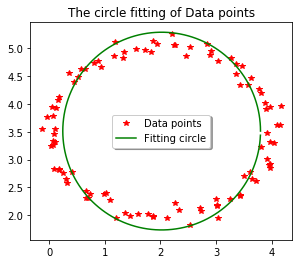

Best fit has centre ( 2.021 , 3.511 ) , radius  1.775


In [2]:
# =============== Main code 1============================#
"a) READ DATA.txt"
File_data = np.loadtxt("L7_test_data.txt", dtype=float)
#print(File_data)

"b) Fit a circle to the points and report the centre and radius"
c = CostFunction_circle(File_data)

"Initial point"
x0=np.ones(3)
res_cir=minimize(c.f,x0,method='Powell') 

cir = make_circle(150,res_cir.x[0], res_cir.x[1], res_cir.x[2])

"c) Plot the best fitting circle on the graph with the points"
plt.plot(File_data[0,:],File_data[1,:],'r*')
plt.title('The circle fitting of Data points')
plt.plot(cir[0,:],cir[1,:],'g')
plt.legend(['Data points', 'Fitting circle'],
           loc='best', shadow=True)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("The_circle_fitting_of_Data_points.png")
plt.show()
print("Best fit has centre (", "{:.3f}".format(res_cir.x[0]),",",
                            "{:.3f}".format(res_cir.x[1]), ")",", radius ",
                            "{:.3f}".format(res_cir.x[2]))

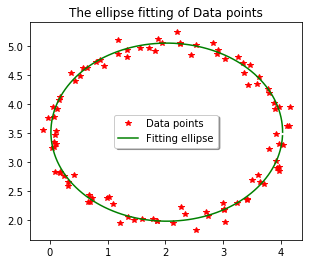

Best fit has centre ( 2.024 , 3.517 ) , radius x: 2.005 , radius y: 1.541


In [3]:
# =============== Main code 2============================#
"d) Fit an axis aligned ellipse to the points and report its parameters"
c_e = CostFunction_ellipse(File_data)

"Initial point"
x0_e=np.ones(4)
res_e=minimize(c_e.f,x0_e,method='Powell') 

elli = make_ellipse(150,res_e.x[0], res_e.x[1], res_e.x[2], res_e.x[3])


"e) Plot the ellipse on the graph"
plt.plot(File_data[0,:],File_data[1,:],'r*')
plt.title('The ellipse fitting of Data points')
plt.plot(elli[0,:],elli[1,:],'g')
plt.legend(['Data points', 'Fitting ellipse'],
           loc='best', shadow=True)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("The_ellipse_fitting_of_Data_points.png")
plt.show()

print("Best fit has centre (", "{:.3f}".format(res_e.x[0]),",",
                            "{:.3f}".format(res_e.x[1]), ")",", radius x:",
                            "{:.3f}".format(res_e.x[2]), ", radius y:",
                            "{:.3f}".format(res_e.x[3]))
